1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

51
100
105
256


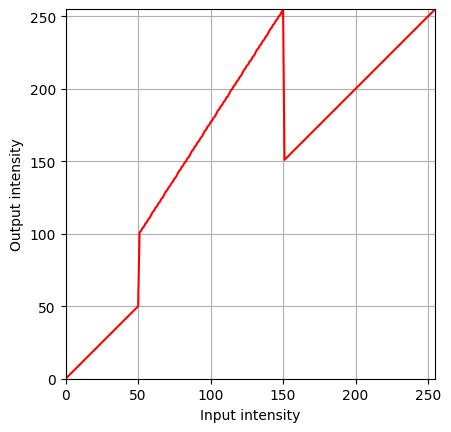

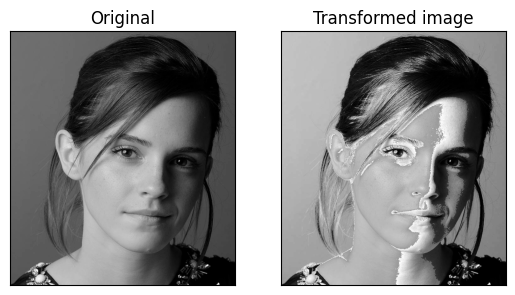

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50, 50), (50, 100),(150, 255),(150, 150),(255,255)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[3, 1] + 1, c[4,1], c[4,0] - c[3, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread(r"zooming\emma.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all')
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray',vmin=0, vmax=255)
axes[1].set_title('Transformed image')
axes[1].set_xticks([]), axes[1].set_yticks([])

cv.destroyAllWindows()


2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

16
125
100
100
256


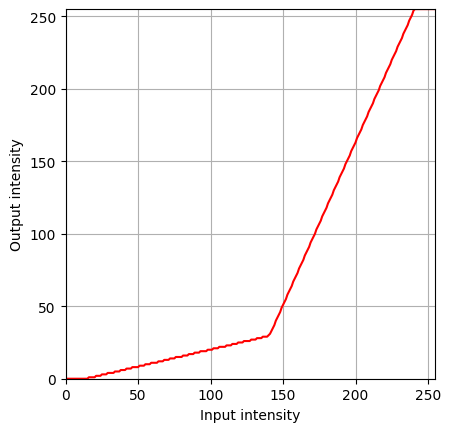

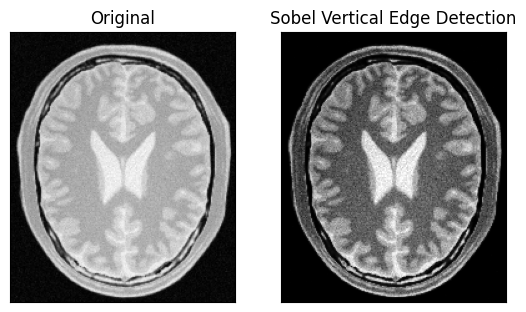

In [6]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(15, 0), (140, 30),(240, 254)])
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1, 1] + 1, c[2,1], c[2,0] - c[1, 0]).astype('uint8')
print(len(t3))
t4 = np.linspace(c[2, 1] + 1, 255, 255 - c[2, 0]).astype('uint8')
print(len(t3))
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

img_orig = cv.imread(r"zooming\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
#img = cv.imshow("Image", img_orig)
#cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
#img2 =cv.imshow("Image", image_transformed)
#cv.waitKey(0)

fig, axes = plt.subplots(1, 2, sharex='all', sharey='all')
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray',vmin=0, vmax=255)
axes[1].set_title('Sobel Vertical Edge Detection')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


3. Consider the image shown in Fig. 3
1
. [10]
(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗
color space and state the γ value.
(b) Show the histograms of the original and corrected images.

Gamma : 0.879278937785045


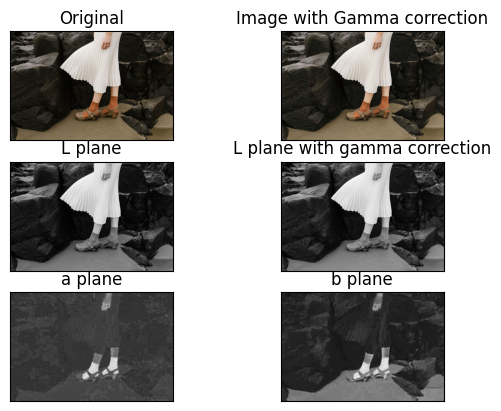

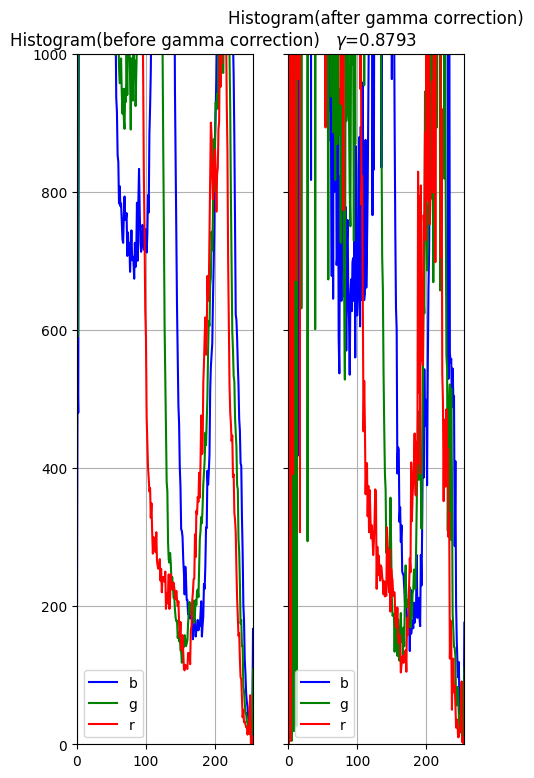

In [7]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img_orig = cv.imread(r"zooming\highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
img_L_orig, img_a, img_b = cv.split(img_orig)

mean = np.mean(img_L_orig)
gamma = math.log(mean)/math.log(128)
print('Gamma :',gamma)

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_L_gamma = cv.LUT(img_L_orig, table)

img_gamma = cv.merge([img_L_gamma, img_a, img_b])
img_cvt_gamma = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB) 

fig, axes = plt.subplots(3, 2)
axes[0,0].imshow(img_orig1, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(img_cvt_gamma, cmap='gray',vmin=0, vmax=255)
axes[0,1].set_title('Image with Gamma correction')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(img_L_orig, cmap='gray')
axes[1,0].set_title('L plane')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(img_L_gamma, cmap='gray',vmin=0, vmax=255)
axes[1,1].set_title('L plane with gamma correction')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

axes[2,0].imshow(img_a, cmap='gray')
axes[2,0].set_title('a plane')
axes[2,0].set_xticks([]), axes[2,0].set_yticks([])

axes[2,1].imshow(img_b, cmap='gray')
axes[2,1].set_title('b plane')
axes[2,1].set_xticks([]), axes[2,1].set_yticks([])

fig1, ax1 =  plt.subplots(1,2,figsize=(5, 10), sharey=all, sharex = all)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig1], [i], None, [256], [0, 256])
    ax1[0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_cvt_gamma], [i], None, [256], [0, 256])
    ax1[1].plot(hist_gamma, color=c)

# Plot the gamma correction lookup table
ax1[0].set_xlim(0, 255)
ax1[0].set_aspect('equal')
ax1[1].set_xlim(0, 255)
ax1[1].set_ylim(0,1000)
ax1[0].set_ylim(0,1000)
ax1[1].set_aspect('equal')

ax1[0].legend(color,loc = 'best')
ax1[1].legend(color,loc = 'best')
ax1[0].set_title('Histogram(before gamma correction)')
ax1[1].set_title('Histogram(after gamma correction)\n'+r'$\gamma$='+str(round(gamma,4)))
ax1[0].grid(True)
ax1[1].grid(True)

# Display the plots
plt.show()


4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation to the saturation plane,
(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.
(b) Apply the aforementioned intensity transformation to the saturation plane.
(c) Adjust a to get a visually pleasing output. Report the value of a.
(d) Recombine the three planes.
(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

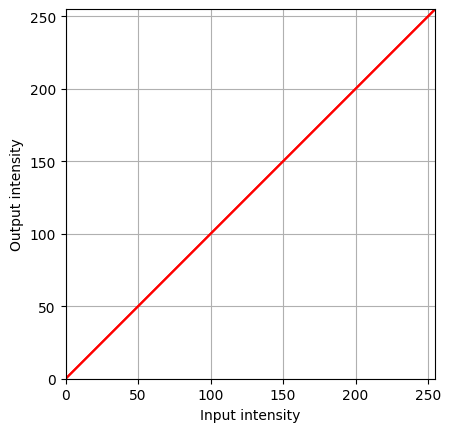

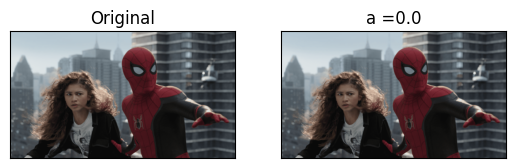

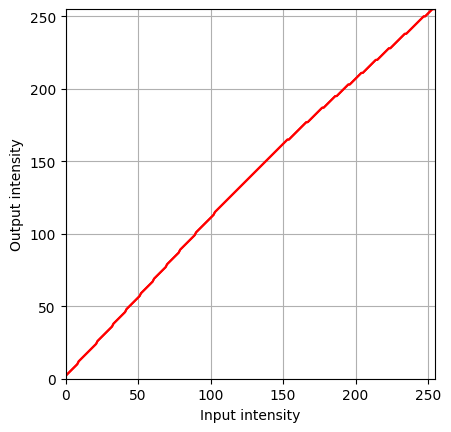

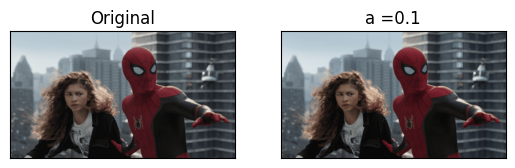

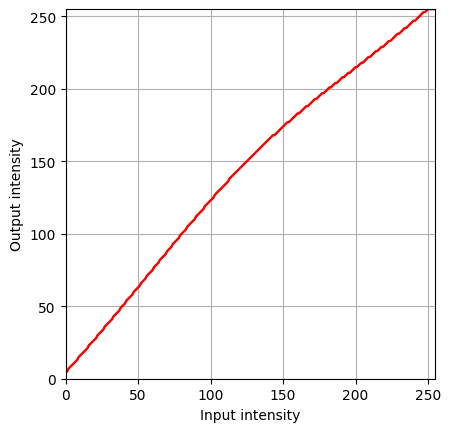

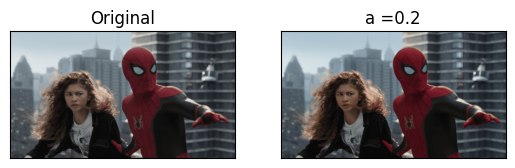

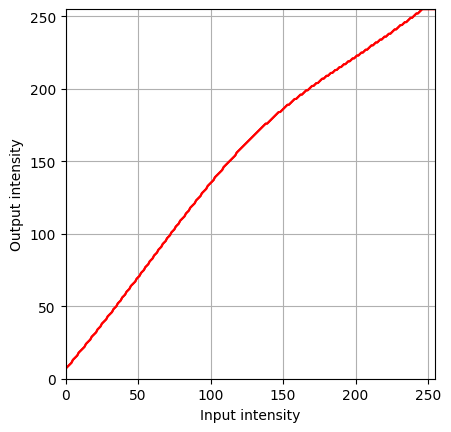

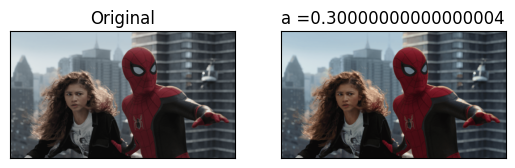

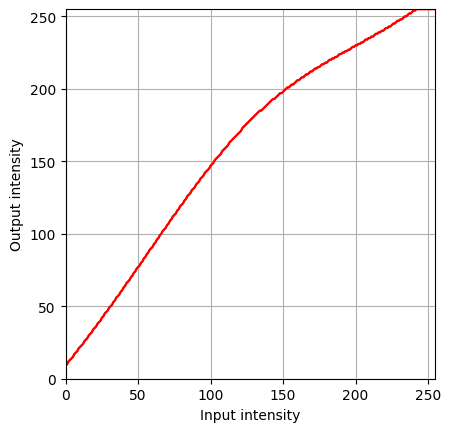

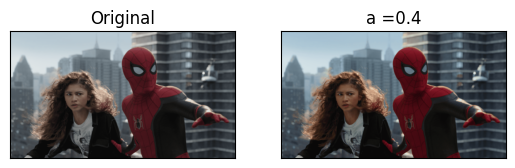

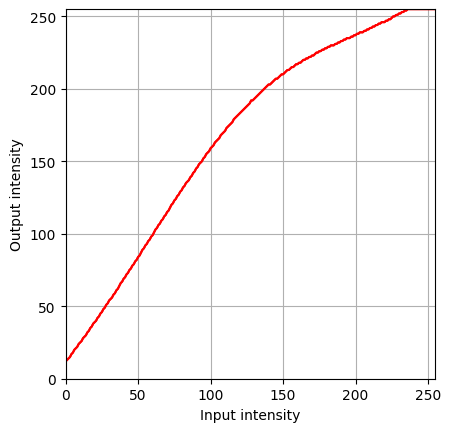

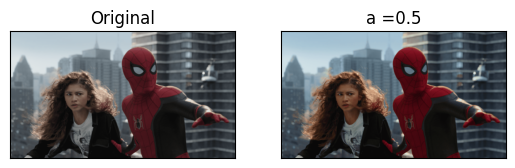

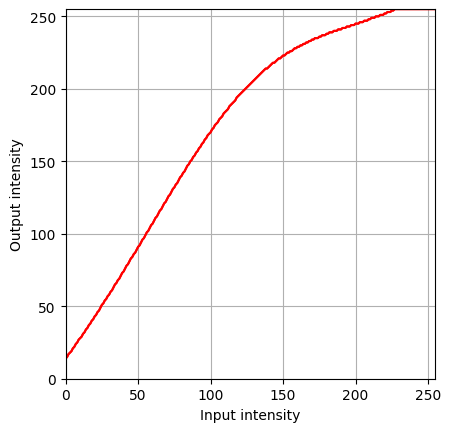

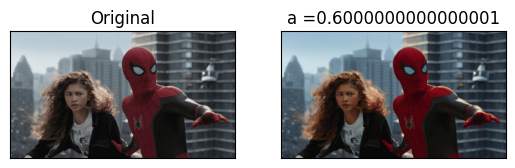

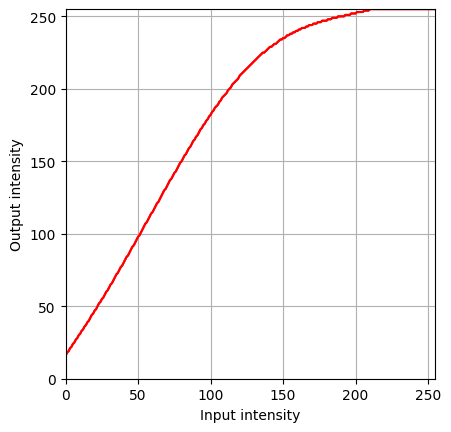

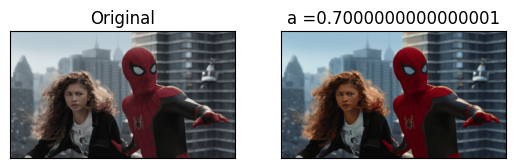

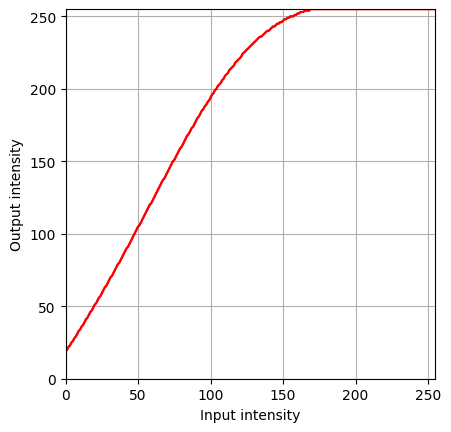

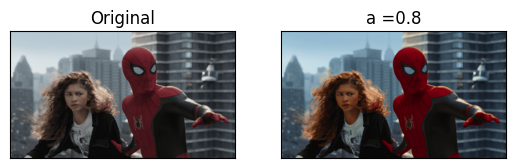

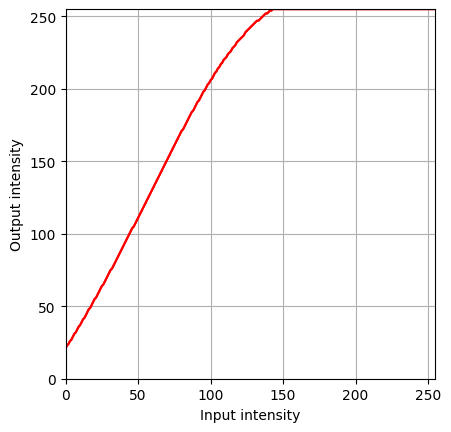

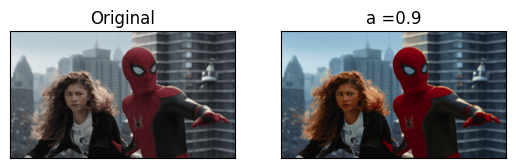

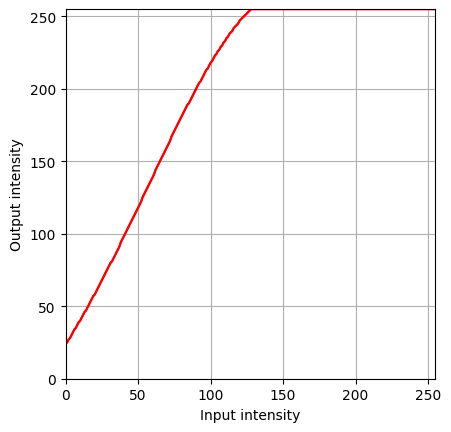

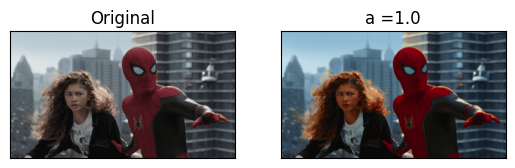

In [8]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


img_orig = cv.imread("zooming/spider.png",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

sigma = 70
sequence = [i*.1 for i in range(0,11)]

for i, a in enumerate(sequence):

    transform = np.array([min((j+128*(a*math.exp(-((j-128)**2)/(2*(sigma**2))))),255) for j in np.arange(0,256)]).astype(np.uint8)
    img_S_trans = cv.LUT(img_S, transform)
    img_trans = cv.merge([img_H, img_S_trans, img_V])
    img_trans1 = cv.cvtColor(img_trans, cv.COLOR_HSV2RGB) 

    fig1, ax1 = plt.subplots()
    ax1.plot(transform, color='red')
    ax1.set_xlabel(r'Input intensity')
    ax1.set_ylabel('Output intensity')
    ax1.set_xlim(0, 255)
    ax1.set_ylim(0, 255)
    ax1.set_aspect('equal')
    ax1.plot(transform, color='red')
    ax1.set_aspect('equal')
    plt.grid(True)

    fig, ax = plt.subplots(1, 2)
    ax[1].imshow(img_trans1, cmap='gray')
    ax[1].set_title('a ='+str(a))
    ax[1].set_xticks([]), ax[1].set_yticks([])

    ax[0].imshow(img_orig1, cmap='gray')
    ax[0].set_title('Original')
    ax[0].set_xticks([]), ax[0].set_yticks([])

    plt.show()
        



a = 0.5 is prefere

5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization.

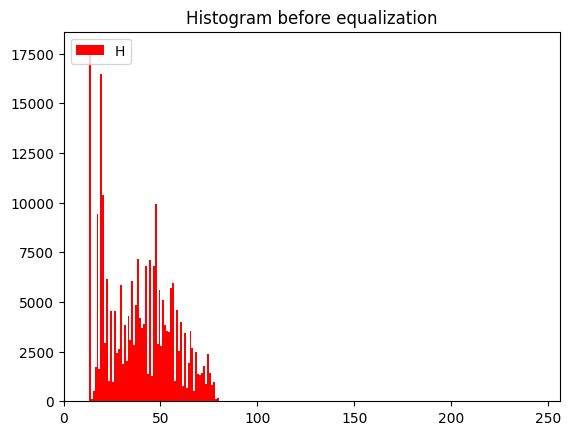

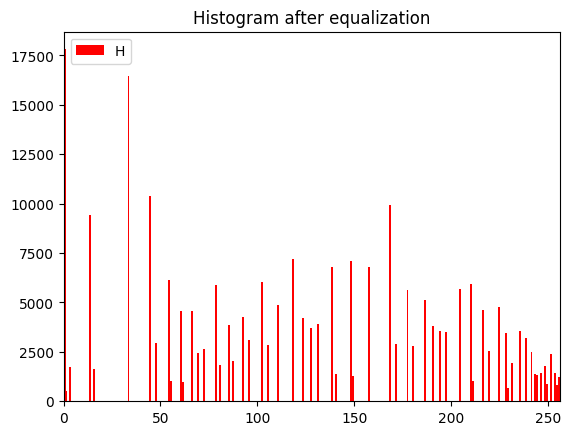

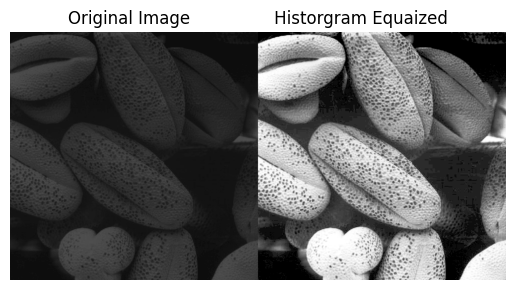

In [9]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def img_eq(img):

    if(len(img.shape) ==3 and img.shape[2] == 3 ):
         img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
         r,g,b = cv.split(img_cvt)
         r_eq = cv.equalizeHist(r)
         g_eq = cv.equalizeHist(g)
         b_eq = cv.equalizeHist(b)
         return cv.merge([r_eq, g_eq, b_eq])
    
    return cv.equalizeHist(img_orig)



def hist(img):


    if(len(img.shape) ==2 or img.shape[2] != 3 ):
        hist, bins = np.histogram(img.ravel(), 256, [0,256])
        plt.hist(img.flatten(), 256, [0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram before equalization')
        plt.show()
        equ = img_eq(img)

       # plt.subplot(1,2,2)
        hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
        plt.hist(equ.flatten(), 256,[0,256], color='r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram after equalization')
        plt.show()


    else:

        color = ('r', 'g', 'b')
        for index, cl in enumerate(color):
            hist = cv.calcHist(img,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            #plt.hist(img.flatten(), 256, [0,256], color = cl)
        plt.title('Histogram before equalization')
        plt.xlim([0, 256])
        plt.show()
        plt.legend(color, loc = 'upper left')

        equ = img_eq(img)

        for index, cl in enumerate(color):
            hist = cv.calcHist(equ,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            #plt.hist(equ.flatten(), 256, [0,256], color = cl)
        plt.title('Histogram after equalization')
        plt.xlim([0, 256])
        plt.legend(color, loc = 'upper left')
        plt.show()

    res = np.hstack((img_orig, equ))
    fig, ax = plt.subplots()
    plt.axis('off')
    plt.imshow(res, cmap='gray')
    ax.set_title("Original Image                Historgram Equaized")

    plt.show()

         
img_orig = cv.imread("zooming/shells.tif", cv.IMREAD_GRAYSCALE)
assert img_orig is not None
eq_img = hist(img_orig)


6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.
(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.
(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
(d) Obtain the cumulative sum of the histogram using np.cumsum.
(e) Use the formulas in slides to histogram-equalize the foreground.
(f) Extract the background and add with the histogram equalized foreground.

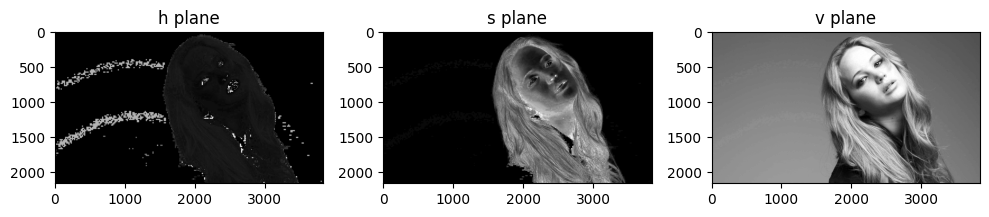

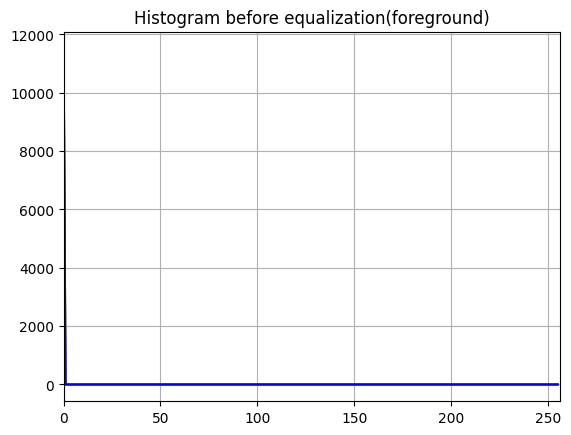

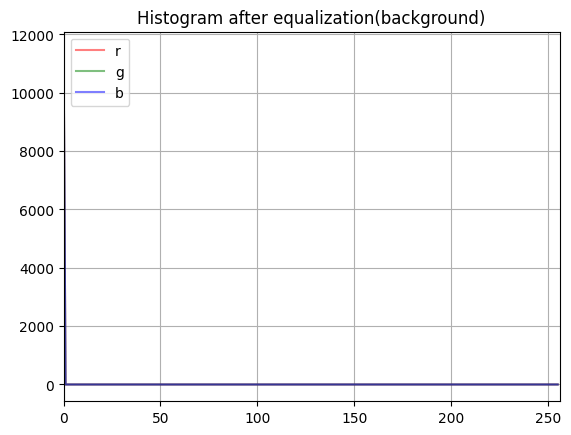

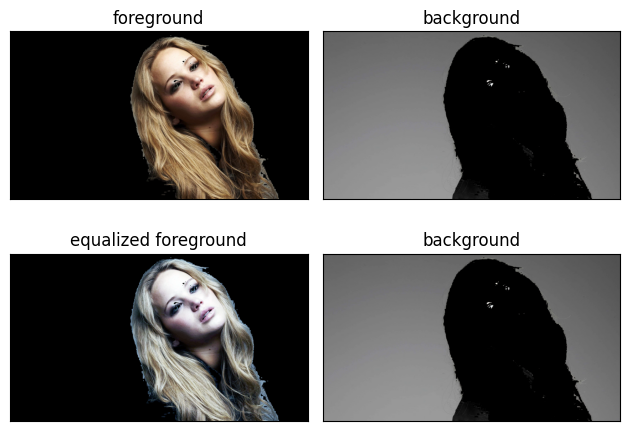

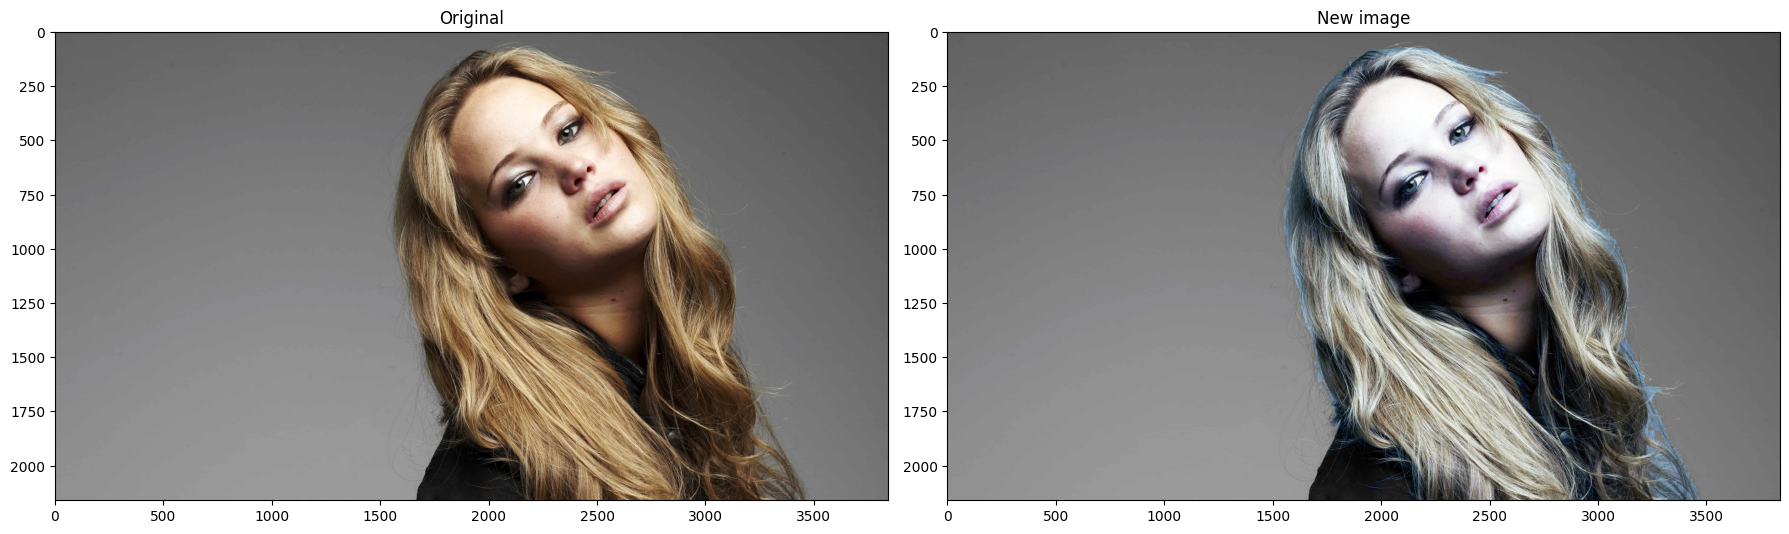

In [10]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig = cv.imread("zooming/jeniffer.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

#display these planes in grayscale
plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(img_H, cmap='gray')
plt.title('h plane')

plt.subplot(1,3,2)
plt.imshow(img_S, cmap='gray')
plt.title('s plane')

plt.subplot(1,3,3)
plt.imshow(img_V, cmap='gray')
plt.title('v plane')

plt.tight_layout()
plt.show()

# threshold in extract the foreground mask
_, mask = cv.threshold(img_S, 15, 255, cv.THRESH_BINARY)
img_foreground = cv.bitwise_and(img_orig1, img_orig1, mask=mask)


#drawing the histrogram of foreground
color = ('r', 'g', 'b')
for index, cl in enumerate(color):
    hist = cv.calcHist(img_foreground,[index],None,[256],[0,256])
    plt.plot(hist, color=cl)
plt.title('Histogram before equalization(foreground)')
plt.xlim([0, 256])
plt.grid(True)
plt.show()
plt.legend(color, loc = 'upper left')


r,g,b = cv.split(img_foreground)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
img_foreground_eq = cv.merge([r_eq, g_eq, b_eq])

for index, cl in enumerate(color):
    hist = cv.calcHist(img_foreground_eq,[index],None,[256],[0,256])
    plt.plot(hist, color=cl,alpha=0.5)
plt.title('Histogram after equalization(background)')
plt.xlim([0, 256])
plt.legend(color, loc = 'upper left')
plt.grid(True)
plt.show()

# img_foreground_gray = cv.cvtColor(img_foreground, cv.COLOR_RGB2GRAY)

# hist, bins = np.histogram(img_foreground_gray.ravel(), 256, [0,256])
# cdf = hist.cumsum()
# cdf_normalized = cdf * hist.max() / cdf.max()
# plt.plot(cdf_normalized, color='b')        
# plt.hist(img_foreground_gray.flatten(), 256, [0,256], color = 'r')
# plt.xlim([0,256])
# plt.legend(('CDF','Histogram'), loc = 'upper left')
# plt.title('Histogram for foreground before equalization')
# plt.show()

# img_foreground_gray_eq = cv.equalizeHist(img_foreground_gray)
#img_foreground_eq = cv.cvtColor(img_foreground_gray_eq, cv.COLOR_GRAY2RGB)
# hist, bins = np.histogram(img_foreground_gray_eq.ravel(), 256, [0, 256])
# plt.hist(img_foreground_gray_eq.flatten(), 256,[0,256], color='r')
# plt.xlim([0,256])
# plt.legend('Histogram', loc = 'upper left')
# plt.title('Histogram for foreground after equalization')
# plt.show()

#extracting background
img_background = cv.bitwise_and(img_orig1, img_orig1, mask = cv.bitwise_not(mask))

#adding equalized foreground and background
new_img = cv.add(img_background, img_foreground_eq)

fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(img_foreground, cmap='gray')
ax[0,0].set_title('foreground')    
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(img_background, cmap='gray')
ax[0,1].set_title('background')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(img_foreground_eq, cmap='gray')
ax[1,0].set_title('equalized foreground')    
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(img_background, cmap='gray')
ax[1,1].set_title('background')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.tight_layout()

fig1, ax1 = plt.subplots(1,2, figsize = (18,18))
ax1[0].imshow(img_orig1)
ax1[0].set_title('Original')
ax1[1].imshow(new_img)
ax1[1].set_title('New image')
plt.tight_layout()
plt.show()

#method2
# res = np.hstack((img_foreground, img_background))
# fig, ax = plt.subplots()
# plt.axis('off')
# plt.imshow(res, cmap='gray')
# ax.set_title("foreground                background")
# plt.show()

# res = np.hstack((img_foreground_eq, img_background))
# fig, ax = plt.subplots()
# plt.axis('off')
# plt.imshow(res, cmap='gray')
# ax.set_title("equalized foreground                background")
# plt.show()









7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7
(a) Using the existing filter2D to Sobel filter the image.
(b) Write your own code to Sobel filter the image.
(c) Using the property

carry out Sobel filtering.


[[ 7  7  7 ...  9  9  9]
 [ 7  7  8 ... 10 10  9]
 [ 7  7  8 ...  8  9  9]
 ...
 [11 10 10 ... 10 10 10]
 [11 11 11 ...  9  8  8]
 [11 11 11 ...  9  8  8]]
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
filter_1 taken time : 0.13742828369140625 ms


filter_2 taken time : 6.602651357650757 ms
filter_3 taken time : 5.657384157180786 ms
filter1: [[0 0 0 ... 0 2 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 3 0 ... 2 1 0]
 [0 1 0 ... 6 3 0]
 [0 0 0 ... 8 4 0]]
filter2: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -3. -4. ... -4.  1.  0.]
 [ 0. -4. -4. ... -4. -2.  0.]
 ...
 [ 0.  3. -4. ...  2.  1.  0.]
 [ 0.  1. -4. ...  6.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
filter3: [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0. -3. -4. ... -4.  1.  0.]
 [ 0. -4. -4. ... -4. -2.  0.]
 ...
 [ 0.  3. -4. ...  2.  1.  0.]
 [ 0.  1. -4. ...  6.  3.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


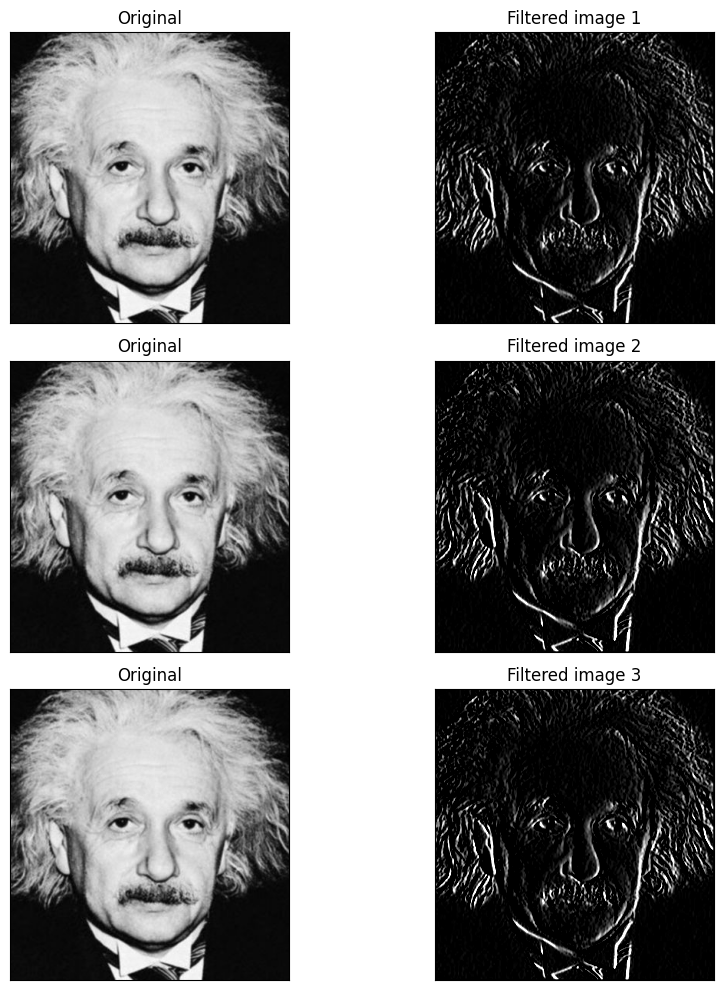

In [11]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time

img_orig = cv.imread(r"zooming\einstein.png",cv.IMREAD_GRAYSCALE)
assert img_orig is not None
print(img_orig)

def filter(img, kernel):
    img_filt = np.zeros((len(img),len(img[0])))

    for j in range(int(len(kernel)/2),len(img)-int(len(kernel)/2)):
        for i in range(int(len(kernel)/2),len(img[0])-int(len(kernel)/2)):
            img_filt[j][i] = 0
            for k1 in range(-int(len(kernel)/2),int(len(kernel)/2)+1):
                for k2 in range(-int(len(kernel[0])/2),int(len(kernel[0])/2)+1):
                    img_filt[j][i] += img[j+k1][i+k2]*kernel[int(len(kernel)/2)+k1][int(len(kernel)/2)+k2]
            #if(img_filt[j][i] <0):
             #   img_filt[j][i] = 0
            #if(img_filt[j][i] >255):
             #   img_filt[j][i] = 255
    return img_filt


def filter2(img, vec1, vec2):
    
    img_filt = np.zeros((len(img),len(img[0])))

    for j in range(int(len(vec2)/2),len(img)-int(len(vec2)/2)):
        for i in range(int(len(vec2)/2),len(img[0])-int(len(vec2)/2)):
            temp = np.zeros(len(vec2))
            for k1 in range(-int(len(vec2)/2),int(len(vec2)/2)+1):
                temp[k1+int(len(vec2)/2)] = np.dot(img[j+k1][i-1:i+2],vec2)

            img_filt[j][i] = np.dot(temp,vec1)

            #if(img_filt[j][i] <0):
             #   img_filt[j][i] = 0
            #if(img_filt[j][i] >255):
             #   img_filt[j][i] = 255
    return img_filt

#Colomn and row vectors
vec1 = np.array([1,2,1], dtype = 'float')
vec2 = np.array([1,0,-1], dtype = 'float')

#obtaining kernel from vectors
kernel = np.outer(vec1,vec2)
print(kernel)

#filtering using exsisting filters
start_time = time.time()
img_filter1 = cv.filter2D(img_orig, -1, kernel)
end_time = time.time()
print("filter_1 taken time :",end_time - start_time,"ms")

#filtering using function by using kernel
start_time = time.time()
img_filter2 = filter(img_orig,kernel)
end_time = time.time()
print("filter_2 taken time :",end_time - start_time,"ms")

#filtering using function by using vectors
start_time = time.time()
img_filter3 = filter2(img_orig, vec1, vec2)
end_time = time.time()
print("filter_3 taken time :",end_time - start_time,"ms")

print("filter1:", img_filter1)
print("filter2:",img_filter2)
print("filter3:",img_filter3)

fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].imshow(img_orig, cmap='gray')
ax[0,0].set_title('Original')
ax[0,0].set_xticks([]),ax[0,0].set_yticks([])

ax[0,1].imshow(img_filter1, cmap='gray',vmin=0,vmax=255)
ax[0,1].set_title('Filtered image 1')
ax[0,1].set_xticks([]),ax[0,1].set_yticks([])

ax[1,0].imshow(img_orig, cmap='gray')
ax[1,0].set_title('Original')
ax[1,0].set_xticks([]),ax[1,0].set_yticks([])

ax[1,1].imshow(img_filter2, cmap='gray',vmin=0,vmax=255)
ax[1,1].set_title('Filtered image 2')
ax[1,1].set_xticks([]),ax[1,1].set_yticks([])

ax[2,0].imshow(img_orig, cmap='gray')
ax[2,0].set_title('Original')
ax[2,0].set_xticks([]),ax[2,0].set_yticks([])

ax[2,1].imshow(img_filter3, cmap='gray',vmin=0,vmax=255)
ax[2,1].set_title('Filtered image 3')
ax[2,1].set_xticks([]),ax[2,1].set_yticks([])

plt.tight_layout()
plt.show()




8. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation.

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def nearest_neighbour(img, scale):
    rows = int(scale*im.shape[0])
    cols = int(scale*im.shape[1])

    zoomed = np.zeros((rows, cols, 3), dtype=np.uint8)

    for i in range(0, rows):
        for j in range(0, cols):   
            zoomed[i,j] = im[int(i/scale), int(j/scale)]
    return zoomed

def bilinear_interpolation(image, scale):
    rows = int(scale*image.shape[0])
    cols = int(scale*image.shape[1])

    zoomed = np.zeros((rows, cols, 3), dtype=np.uint8)

    for i in range(0, rows):
        for j in range(0, cols):   
            x = i / scale
            y = j / scale
            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = int(np.ceil(x)), int(np.ceil(y))
            dx, dy = x - x1, y - y1
            
            if x2 >= rows/scale or y2 >= cols/scale:
                continue
            
            interpolated_pixel = (1 - dx) * (1 - dy) * image[x1, y1] + dx * (1 - dy) * image[x2, y1] + (1 - dx) * dy * image[x1, y2] + dx * dy * image[x2, y2]
            print(interpolated_pixel)
            zoomed[i, j] = interpolated_pixel.astype(np.uint8)
    
    return zoomed

im = cv.imread(r"zooming\im02.png",cv.IMREAD_COLOR)
im = cv.cvtColor(im, cv.COLOR_RGB2BGR)

for scale in (2, 11):

    zoomed1 = nearest_neighbour(im, scale)
    zoomed2 = bilinear_interpolation(im, scale)

    fig, ax = plt.subplots(1,3, sharex=all, sharey=all)

    ax[0].imshow(im, cmap='gray')
    ax[0].set_title('Original')
    ax[0].set_xticks([]),ax[0].set_yticks([])

    ax[1].imshow(zoomed1 , cmap='gray',vmin=0,vmax=255)
    ax[1].set_title('zoomed image with scale factor '+str(scale))
    ax[1].set_xticks([]),ax[1].set_yticks([])

    ax[2].imshow(zoomed2 , cmap='gray',vmin=0,vmax=255)
    ax[2].set_title('zoomed image with scale factor '+str(scale))
    ax[2].set_xticks([]),ax[2].set_yticks([])
    plt.tight_layout()
    plt.show()


[85. 63. 52.]
[84.5 62.5 51.5]
[84. 62. 51.]
[83.5 61.5 50.5]
[83. 61. 50.]
[84. 62. 51.]
[85. 63. 52.]
[85.5 63.5 52.5]
[86. 64. 53.]
[85.5 63.5 52.5]
[85. 63. 52.]
[83.5 61.5 50.5]
[82. 60. 49.]
[80.5 58.5 47.5]
[79. 57. 46.]
[79.5 57.5 46.5]
[80. 58. 47.]
[81. 59. 48.]
[82. 60. 49.]
[81.5 60.5 49.5]
[81. 61. 50.]
[80.  61.  49.5]
[79. 61. 49.]
[78. 60. 48.]
[77. 59. 47.]
[76.5 59.5 47. ]
[76. 60. 47.]
[77. 61. 48.]
[78. 62. 49.]
[79. 63. 49.]
[80. 64. 49.]
[80. 64. 49.]
[80. 64. 49.]
[80.  64.  48.5]
[80. 64. 48.]
[80. 64. 48.]
[80. 64. 48.]
[79.5 63.5 47.5]
[79. 63. 47.]
[78.  62.  46.5]
[77. 61. 46.]
[76. 60. 45.]
[75. 59. 44.]
[74.5 58.5 44.5]
[74. 58. 45.]
[73.5 57.5 44.5]
[73. 57. 44.]
[74.5 58.5 45.5]
[76. 60. 47.]
[75.5 59.5 46.5]
[75. 59. 46.]
[75.  58.5 47. ]
[75. 58. 48.]
[74.5 57.5 47.5]
[74. 57. 47.]
[74. 57. 48.]
[74. 57. 49.]
[73.5 56.5 48.5]
[73. 56. 48.]
[73.5 56.5 48.5]
[74. 57. 49.]
[74. 57. 48.]
[74. 57. 47.]
[73.5 56.5 46.5]
[73. 56. 46.]
[73.  56.5 45. ]
[73. 57

KeyboardInterrupt: 

9. Fig. 8
shows a flower image with both the foreground and background are in focus. [15]
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.
(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.
(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?


9. Fig. 8
shows a flower image with both the foreground and background are in focus. [15]
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.
(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.
(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?

(264, 174, 3)


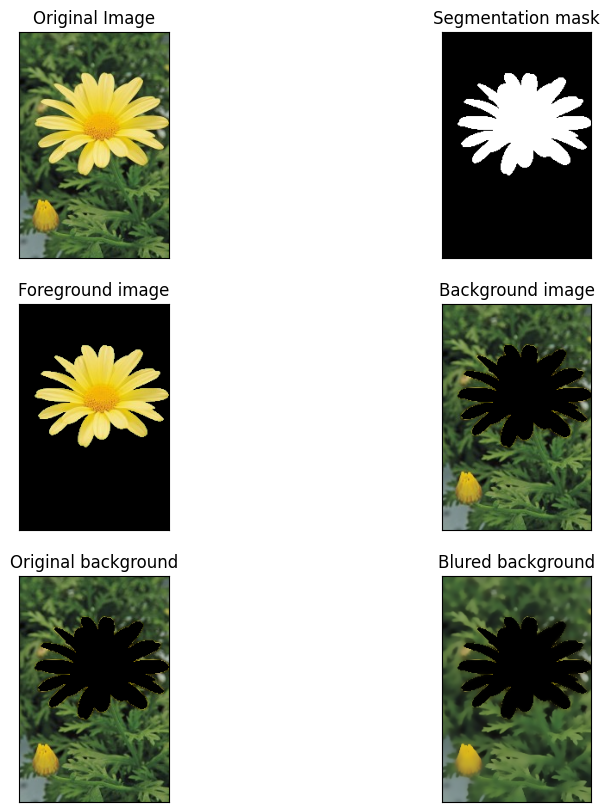

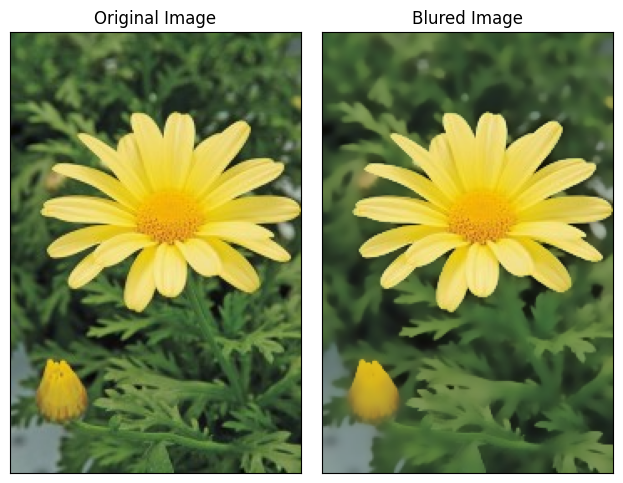

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig1 = cv.imread(r"zooming\q9.jpg",cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB)

mask = np.zeros(img_orig.shape[:2], dtype=np.uint8)

print(img_orig.shape)

start_x = 15 #19
start_y = 45 #49
w = 160 #159
h = 125 #122

rect = (start_x,start_y, w, h)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(img_orig, mask, rect, bgdModel, fgdModel, iterCount=5,mode =cv.GC_INIT_WITH_RECT )

segmented_mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
#binary_mask = np.where(segmented_mask>0, 255, 0).astype(np.uint8)

fgd_img = img_orig*segmented_mask[:, :, np.newaxis]
bgd_img = img_orig*(1-segmented_mask[:, :, np.newaxis])


#blured_bgd_img = cv.blur(bgd_img, (img_orig.shape[:2]))
#blured_bgd_img = cv.GaussianBlur(bgd_img,(0,0), sigmaX = 50)
blured_bgd_img = cv.bilateralFilter(bgd_img, 9, 75, 100)

#blured_bgd_img = cv.medianBlur(bgd_img, 5)



#blured_img[segmented_mask == 1] = fgd_img[segmented_mask == 1]  #oneshot assembly

#blured_bgd_img[segmented_mask == 1] = bgd_img[segmented_mask == 1]


blured_img = cv.add(fgd_img, blured_bgd_img) #prefered


visual_mask = np.zeros_like(img_orig)
visual_mask[:, :, 0] = segmented_mask * 255  # Red channel
visual_mask[:, :, 1] = segmented_mask * 255  # Green channel
visual_mask[:, :, 2] = segmented_mask * 255  # Blue channel

fig, ax = plt.subplots(3,2, sharex=all, sharey=all, figsize =(10, 10))

ax[0,0].imshow(img_orig, cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]),ax[0,0].set_yticks([])

ax[0,1].imshow(segmented_mask* 255, cmap='gray',vmin=0,vmax=255)
ax[0,1].set_title("Segmentation mask")
ax[0,1].set_xticks([]),ax[0,1].set_yticks([])

ax[1, 0].imshow(fgd_img , cmap='gray',vmin=0,vmax=255)
ax[1, 0].set_title("Foreground image")
ax[1, 0].set_xticks([]),ax[1, 0].set_yticks([])

ax[1, 1].imshow(bgd_img , cmap='gray',vmin=0,vmax=1)
ax[1, 1].set_title("Background image")
ax[1, 1].set_xticks([]),ax[1, 1].set_yticks([])

ax[2, 0].imshow(bgd_img, cmap='gray',vmin=0,vmax=255)
ax[2, 0].set_title('Original background')
ax[2, 0].set_xticks([]),ax[2, 0].set_yticks([])

ax[2, 1].imshow(blured_bgd_img , cmap='gray',vmin=0,vmax=1)
ax[2, 1].set_title("Blured background")
ax[2, 1].set_xticks([]),ax[2, 1].set_yticks([])

fig1, ax1 = plt.subplots(1,2, sharex=all, sharey=all)
ax1[0].imshow(img_orig, cmap='gray',vmin=0,vmax=255)
ax1[0].set_title('Original Image')
ax1[0].set_xticks([]),ax1[0].set_yticks([])

ax1[1].imshow(blured_img , cmap='gray',vmin=0,vmax=1)
ax1[1].set_title("Blured Image")
ax1[1].set_xticks([]),ax1[1].set_yticks([])

plt.tight_layout()
plt.show()